In [67]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


whitewine = pd.read_csv('winequality-white.csv', sep=';')
whitewine.head()
whitewine.info()
whitewine.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.0            0.15              0.28         14.7            0.051      29.0                 149.0                 0.99792  2.96  0.39       9.0      7          8
7.3            0.19              0.27         13.9            0.057      45.0                 155.0                 0.99807  2.94  0.41       8.8      8          8
7.4            0.16              0.30         13.7            0.056      33.0                 168.0                 0.99825  2.90  0.44       8.7      7          7
6.8            0.18              0.30         12.8            0.062      19.0                 171.0                 0.99808  3.00  0.52       9.0      7          7
7.4            0.19              0.30         12.8            0.053      48.5                 229.0                 0.99860  3.14  0.49       9.1      7          6
                     

In [68]:
# make a copy of the data

whitewine_copy = whitewine.copy() 

#create a new column called 'quality_label' and assign the value based on the 'quality' column  value
# 0-4 = 'low'   5-6 = 'medium'   7-10 = 'high'  
whitewine_copy['quality_label'] = whitewine_copy['quality'].apply(lambda value: 'low' if value <= 4 else 'medium' if value <= 6 else 'high')

whitewine_copy.head()

#coun the number of each quality label
whitewine_copy['quality_label'].value_counts()

quality_label
medium    3655
high      1060
low        183
Name: count, dtype: int64

Number of outliers by quality label:
quality_label
medium    683
high      263
low        94
Name: count, dtype: int64

Percentage of outliers in each label:
quality_label
medium    18.69
high      24.81
low       51.37
Name: count, dtype: float64


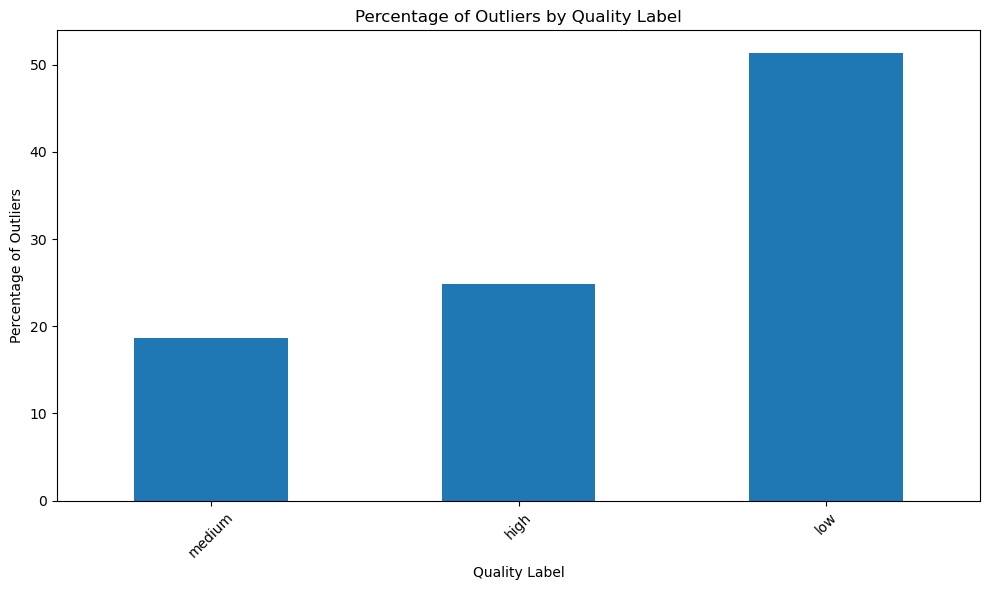

In [69]:
# Calculate IQR for each numeric feature
numeric_cols = whitewine_copy.select_dtypes(include=[np.number]).columns
Q1 = whitewine_copy[numeric_cols].quantile(0.25)
Q3 = whitewine_copy[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Create outlier mask
outlier_mask = ((whitewine_copy[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                (whitewine_copy[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Count outliers for each quality label
outliers_by_label = whitewine_copy[outlier_mask]['quality_label'].value_counts()
total_by_label = whitewine_copy['quality_label'].value_counts()

# Calculate percentage of outliers in each label
outlier_percentages = (outliers_by_label / total_by_label * 100).round(2)

print("Number of outliers by quality label:")
print(outliers_by_label)
print("\nPercentage of outliers in each label:")
print(outlier_percentages)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
outlier_percentages.plot(kind='bar')
plt.title('Percentage of Outliers by Quality Label')
plt.xlabel('Quality Label')
plt.ylabel('Percentage of Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
# # First identify high quality wines
# high_quality_mask = whitewine_copy['quality_label'] == 'high'
# high_quality_wines = whitewine_copy[high_quality_mask]

# # Calculate IQR for high quality wines only
# numeric_cols = high_quality_wines.select_dtypes(include=[np.number]).columns
# Q1 = high_quality_wines[numeric_cols].quantile(0.25)
# Q3 = high_quality_wines[numeric_cols].quantile(0.75)
# IQR = Q3 - Q1

# # Create outlier mask for high quality wines
# outlier_mask = ((high_quality_wines[numeric_cols] < (Q1 - 1.5 * IQR)) | 
#                 (high_quality_wines[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# # Get indices of high quality outliers
# high_quality_outlier_indices = high_quality_wines[outlier_mask].index

# # Remove high quality outliers from the original dataset
# whitewine_copy = whitewine_copy[~whitewine_copy.index.isin(high_quality_outlier_indices)]

# print(f"Shape after removing high quality outliers: {whitewine_copy.shape}")

In [71]:
#drop the 'quality' column
whitewine_copy = whitewine_copy.drop(columns='quality')
whitewine_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium


In [72]:
from sklearn.preprocessing import OrdinalEncoder

# Create encoder for quality
ord_encoder = OrdinalEncoder(categories=[["low", "medium", "high"]])  

# Create new column for encoded quality values
whitewine_copy['quality_label_encoded'] = ord_encoder.fit_transform(
whitewine_copy[['quality_label']]
)

print("Original quality labels:", whitewine_copy['quality_label'].unique())
print("Encoded quality labels:", whitewine_copy['quality_label_encoded'].unique())

Original quality labels: ['medium' 'high' 'low']
Encoded quality labels: [1. 2. 0.]


Base - Modelling

Accuracy: 0.8653061224489796

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.13      0.22        30
         1.0       0.87      0.96      0.91       723
         2.0       0.84      0.67      0.74       227

    accuracy                           0.87       980
   macro avg       0.79      0.59      0.63       980
weighted avg       0.86      0.87      0.85       980



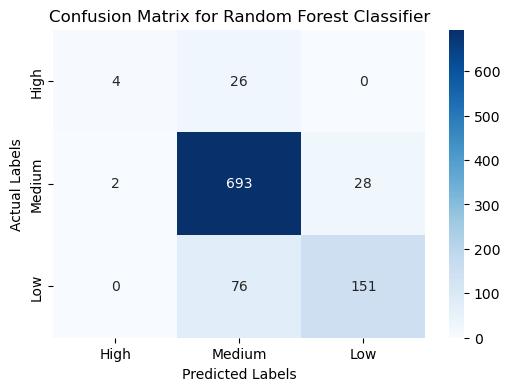

In [91]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare features and target
X = whitewine_copy.drop(['quality_label', 'quality_label_encoded'], axis=1)
y = whitewine_copy['quality_label_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
predictions = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['High', 'Medium', 'Low'],
            yticklabels=['High', 'Medium', 'Low'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [75]:
#print the classification report
print(classification_report(y_test, preds))

#print confusion matrix
print(conf_matrix)

#print accuracy
print(acc)

              precision    recall  f1-score   support

         0.0       0.67      0.13      0.22        30
         1.0       0.87      0.96      0.91       723
         2.0       0.84      0.67      0.74       227

    accuracy                           0.87       980
   macro avg       0.79      0.59      0.63       980
weighted avg       0.86      0.87      0.85       980

[[  4  26   0]
 [  2 693  28]
 [  0  76 151]]
0.8653061224489796


Hyperparameter_tuning

Accuracy Score: 0.8245

Classification Report:
              precision    recall  f1-score   support

         0.0       0.36      0.53      0.43        30
         1.0       0.91      0.85      0.88       723
         2.0       0.68      0.78      0.73       227

    accuracy                           0.82       980
   macro avg       0.65      0.72      0.68       980
weighted avg       0.84      0.82      0.83       980



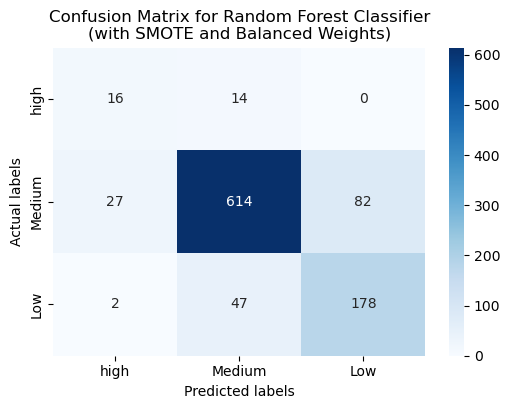

In [92]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize the model with improved parameters
RF_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)

# Fit the model on balanced data
RF_model.fit(X_train_balanced, y_train_balanced)

# Prediction
preds = RF_model.predict(X_test)

# Calculate and print accuracy
acc = accuracy_score(y_test, preds)
print(f"Accuracy Score: {acc:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, preds))

# Create and plot confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['high', 'Medium', 'Low'],
            yticklabels=['high', 'Medium', 'Low'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix for Random Forest Classifier\n(with SMOTE and Balanced Weights)')
plt.show()
